In [28]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("dataset.csv", header=None)
data.head(5)

,0,1
0,crop_m1/I00000.png,9B52145
1,crop_h1/I00000.png,9B52145
2,crop_m1/I00001.png,6B94558
3,crop_h1/I00001.png,6B94558
4,crop_m1/I00002.png,8B90164


In [30]:
len(data)

652

In [31]:
vehicle_no_length = [len(vehicle_no) for vehicle_no in data[1].values]
data["length"] = vehicle_no_length
data.head(5)

,0,1,length
0,crop_m1/I00000.png,9B52145,7
1,crop_h1/I00000.png,9B52145,7
2,crop_m1/I00001.png,6B94558,7
3,crop_h1/I00001.png,6B94558,7
4,crop_m1/I00002.png,8B90164,7


<AxesSubplot:>

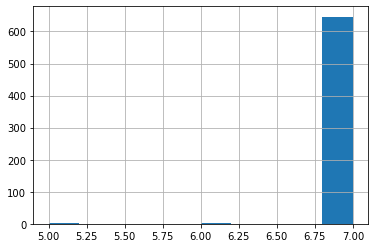

In [32]:
data["length"].hist()

In [33]:
# Distribution of length
data["length"].value_counts()

7    646
5      4
6      2
Name: length, dtype: int64

# out of 652 total images, 6 images has length not equals 7, So, lets remove these 6 images

In [34]:
data = data[data["length"] == 7]
data["length"].value_counts()

7    646
Name: length, dtype: int64

In [35]:
# for idx, row in data.iterrows():
#     if row[0].split("/")[0][:-1] == "crop_m":
#         data.at[idx, 0] = "normal/" + row[0]
#     else:
#         data.at[idx, 0] = "hdr/" + row[0]
        
# data.head(5)      

# Lets visualize some images

(129, 348, 3)


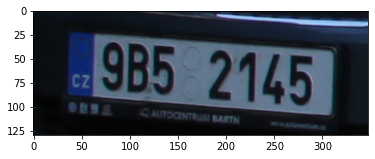

(129, 348, 3)


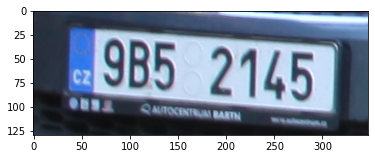

In [36]:
def visualize_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    print(img.shape)
    plt.imshow(img)
    plt.show()
    
visualize_img("normal/crop_m1/I00000.png")
visualize_img("hdr/crop_h1/I00000.png")

# Lets find the distribution of each place digit

In [37]:
def visualize_distribution(idx):
    values = sorted([vehicle_no[idx] for vehicle_no in data[1].values])
    plt.hist(values, density=True, bins=50)  # density=False would make counts
    plt.ylabel('Count')
    plt.xlabel('Characters')
    plt.title(f"Distribution of character {idx + 1} in vehicle no plate")
    plt.show()

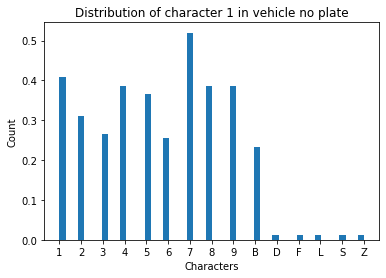

In [38]:
visualize_distribution(0)

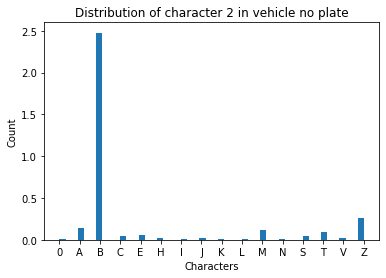

In [39]:
visualize_distribution(1)

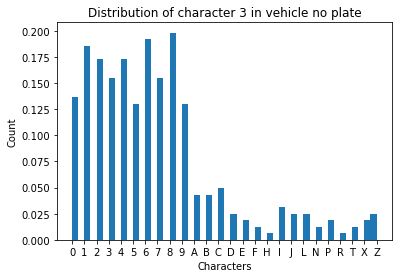

In [40]:
visualize_distribution(2)

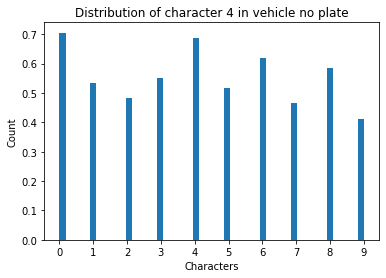

In [41]:
visualize_distribution(3)

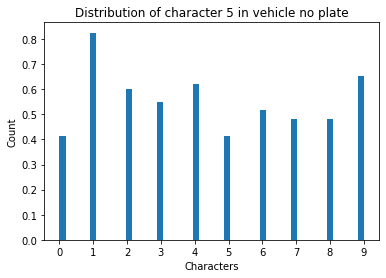

In [42]:
visualize_distribution(4)

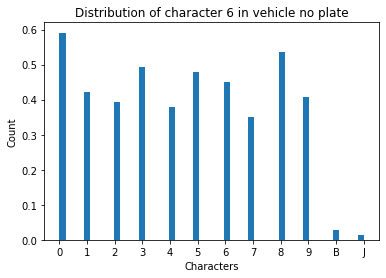

In [43]:
visualize_distribution(5)

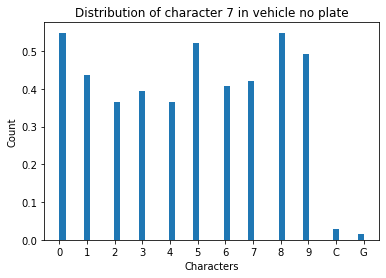

In [44]:
visualize_distribution(6)

# Distribution of digits 

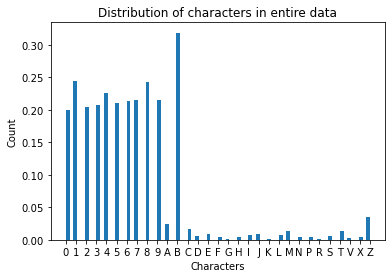

In [45]:
all_characters = []
for idx, row in data.iterrows():
    for ch in row[1]:
        all_characters.append(ch)
        
all_characters = sorted(all_characters)
plt.hist(all_characters, density=True, bins=80)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Characters')
plt.title(f"Distribution of characters in entire data")
plt.show()

number plates consists of mostly digits, and except B all alphabets are very rarely used

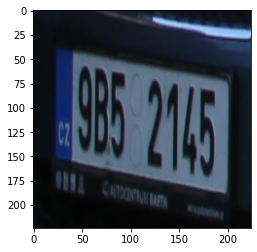

In [46]:
img = cv2.imread("normal/crop_m1/I00000.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
plt.show()

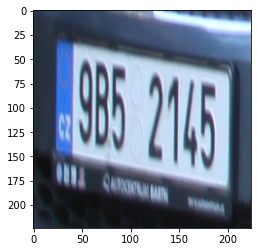

In [47]:
img = cv2.imread("hdr/crop_h1/I00000.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.resize(img, (224, 224))
plt.imshow(img)
plt.show()

In [48]:
import shutil

In [55]:
def copy_files(src_folder, dest_folder):
    dest_imgs = os.listdir(dest_folder)
    folders = os.listdir(src_folder)
    for folder in folders:
        folder_path = os.path.join(src_folder, folder)
        if os.path.isdir(folder_path):
            images = os.listdir(folder_path)
            for img in images:
                if f"{folder}_{img}" not in dest_imgs:
                    shutil.copy(os.path.join(folder_path, img), os.path.join(dest_folder, f"{folder}_{img}"))
                

copy_files("hdr", "dataset/data")

In [56]:
copy_files("normal", "dataset/data")

In [53]:
for idx, row in data.iterrows():
    data.at[idx, 0] = row[0].replace("/", "_")
    print(row[0].replace("/", "_"))


crop_m1_I00000.png
crop_h1_I00000.png
crop_m1_I00001.png
crop_h1_I00001.png
crop_m1_I00002.png
crop_h1_I00002.png
crop_m1_I00003.png
crop_h1_I00003.png
crop_m2_I00000.png
crop_h2_I00000.png
crop_m2_I00001.png
crop_h2_I00001.png
crop_m2_I00002.png
crop_h2_I00002.png
crop_m2_I00003.png
crop_h2_I00003.png
crop_m2_I00004.png
crop_h2_I00004.png
crop_m2_I00005.png
crop_h2_I00005.png
crop_m2_I00006.png
crop_h2_I00006.png
crop_m2_I00007.png
crop_h2_I00007.png
crop_m2_I00008.png
crop_h2_I00008.png
crop_m2_I00009.png
crop_h2_I00009.png
crop_m2_I00010.png
crop_h2_I00010.png
crop_m2_I00011.png
crop_h2_I00011.png
crop_m2_I00012.png
crop_h2_I00012.png
crop_m2_I00013.png
crop_h2_I00013.png
crop_m2_I00019.png
crop_h2_I00019.png
crop_m2_I00039.png
crop_h2_I00039.png
crop_m3_I00000.png
crop_h3_I00000.png
crop_m3_I00001.png
crop_h3_I00001.png
crop_m3_I00002.png
crop_h3_I00002.png
crop_m3_I00003.png
crop_h3_I00003.png
crop_m3_I00004.png
crop_h3_I00004.png
crop_m3_I00005.png
crop_h3_I00005.png
crop_m3_I000

In [59]:
data.rename(columns={0: "images", 1: "labels"}, inplace=True)
data.to_csv(os.path.join("dataset", "dataset.csv"), index=False)